In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
df1=pd.read_csv('Covid dataset/daily_statewise_report.csv')

In [120]:
df1.head()

,Date,State,Confirmed,Recovered,Deceased
0,14-Mar-20,Andhra Pradesh,1,0,0
1,14-Mar-20,Arunachal Pradesh,0,0,0
2,14-Mar-20,Assam,0,0,0
3,14-Mar-20,Bihar,0,0,0
4,14-Mar-20,Chhattisgarh,0,0,0


In [121]:
df1.shape

(4958, 5)

In [122]:
df2=pd.read_csv('Covid dataset/date_wise.csv')

In [123]:
df2.head()

,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,0,30 January,1,1,0,0,0,0
1,1,31 January,0,1,0,0,0,0
2,2,01 February,0,1,0,0,0,0
3,3,02 February,1,2,0,0,0,0
4,4,03 February,1,3,0,0,0,0


In [124]:
df2.shape

(178, 8)

In [125]:
df3=pd.read_csv('Covid dataset/state_wise.csv')

In [126]:
df3.head()

,Unnamed: 0,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time
0,0,Total,1389221,887296,32128,469377,26/07/2020 13:51:24
1,1,Maharashtra,366368,207194,13389,145481,25/07/2020 20:18:45
2,2,Tamil Nadu,206737,151055,3409,52273,25/07/2020 18:17:23
3,3,Delhi,129531,113068,3806,12657,25/07/2020 17:54:22
4,4,Karnataka,90942,33750,1798,55385,25/07/2020 20:39:24


In [127]:
df3.shape

(38, 7)

In [128]:
df1.isna().sum()

Date         0
State        0
Confirmed    0
Recovered    0
Deceased     0
dtype: int64

In [129]:
df2.isna().sum()

Unnamed: 0         0
Date               0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [130]:
df3.isna().sum()

Unnamed: 0           0
State                0
Confirmed            0
Recovered            0
Deaths               0
Active               0
Last_Updated_Time    0
dtype: int64

## States with high confirmed cases

In [131]:
df3.drop(['Unnamed: 0'],axis=1,inplace=True)

In [132]:
for i in df3.columns:
    print(i,type(df3[i][1]))

State <class 'str'>
Confirmed <class 'numpy.int64'>
Recovered <class 'numpy.int64'>
Deaths <class 'numpy.int64'>
Active <class 'numpy.int64'>
Last_Updated_Time <class 'str'>


In [133]:
df3['Last_Updated_Time']=pd.to_datetime(df3['Last_Updated_Time'],errors='coerce')

In [134]:
h=df3[['State','Confirmed']].sort_values(by='Confirmed',ascending=False).head(10)

In [135]:
h=h[h['State']!='Total']

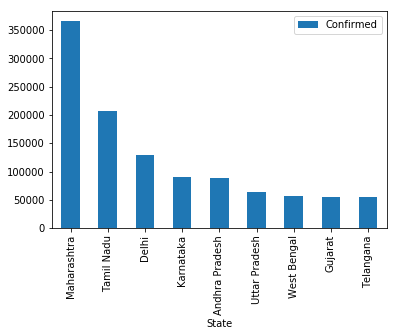

In [136]:
h.plot(kind='bar',x='State')

## States with Low confirmed covid cases

In [137]:
g=df3[['State','Confirmed']].sort_values(by='Confirmed',ascending=False).tail(4)

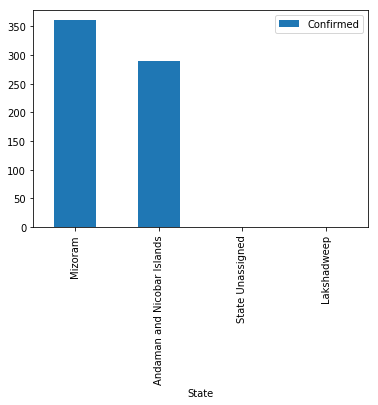

In [138]:
g.plot(kind='bar',x='State')

## Relation between confirmed and death cases in states ith high vulnerabilty

In [139]:
#Confirmed vs Deaths

In [140]:
i=df3[['State','Recovered','Deaths']].sort_values(by='Deaths',ascending=False).head(10)

In [141]:
i=i[i['State']!='Total']

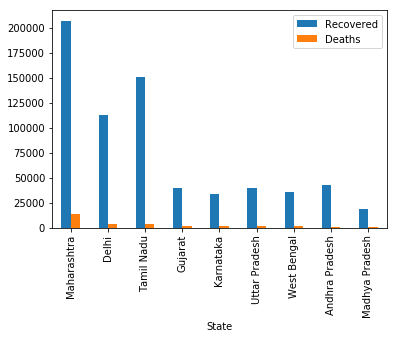

In [142]:
i.plot(kind='bar',x='State')

In [143]:
i.head(10)

,State,Recovered,Deaths
1,Maharashtra,207194,13389
3,Delhi,113068,3806
2,Tamil Nadu,151055,3409
7,Gujarat,39714,2301
4,Karnataka,33750,1798
6,Uttar Pradesh,39903,1387
8,West Bengal,35654,1332
5,Andhra Pradesh,43255,985
14,Madhya Pradesh,18488,799


## To check the range of covid cases each day

In [144]:
df2.head()

,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,0,30 January,1,1,0,0,0,0
1,1,31 January,0,1,0,0,0,0
2,2,01 February,0,1,0,0,0,0
3,3,02 February,1,2,0,0,0,0
4,4,03 February,1,3,0,0,0,0


In [145]:
df2.drop(['Unnamed: 0'],axis=1,inplace=True)

In [146]:
df2['Active Cases']=df2['Total Confirmed']-df2['Total Recovered']

In [147]:
df2.sample(3)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Active Cases
102,11 May,3592,70768,1579,22549,81,2294,48219
126,04 June,9847,226723,4390,108454,274,6362,118269
96,05 May,2971,49405,1295,14140,128,1694,35265


(array([124.,  36.,  14.,   2.,   1.,   0.,   0.,   1.]),
 array([   0. ,  250.5,  501. ,  751.5, 1002. , 1252.5, 1503. , 1753.5,
        2004. ]),
 <a list of 8 Patch objects>)

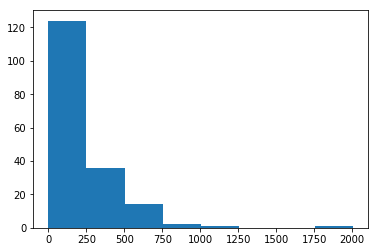

In [148]:
plt.hist(df2['Daily Deceased'],bins=8)

## Time series plot for confirmed and recovered

In [149]:
df2.shape

(178, 8)

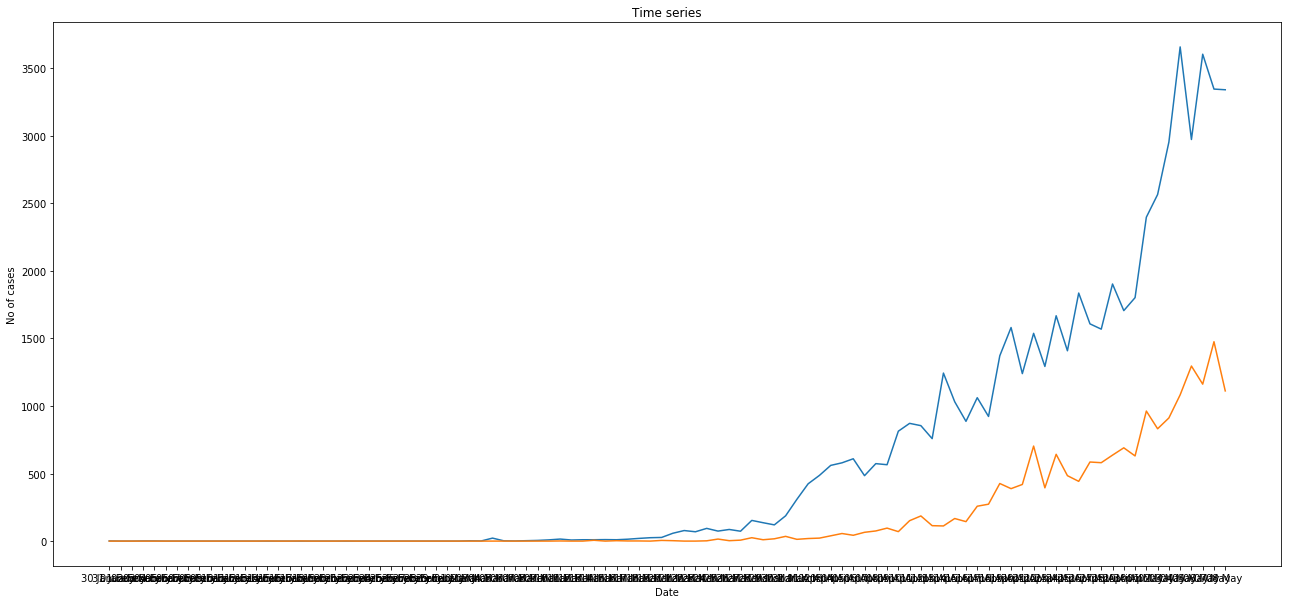

In [150]:
plt.figure(figsize=(22,10))
plt.plot(df2["Date"][:100],df2["Daily Confirmed"][:100])
plt.plot(df2["Date"][:100],df2["Daily Recovered"][:100])

plt.title("Time series")
plt.xlabel("Date")
plt.ylabel("No of cases")
plt.show()

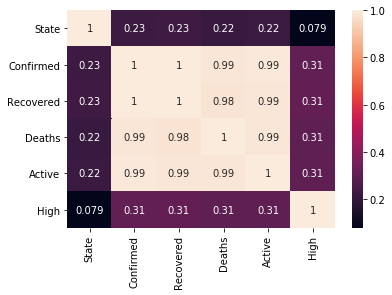

In [367]:
df3.corr()
sns.heatmap(df3.corr(),annot=True)

## Decision Tree Regressor

In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [152]:
df1.head(2)

,Date,State,Confirmed,Recovered,Deceased
0,14-Mar-20,Andhra Pradesh,1,0,0
1,14-Mar-20,Arunachal Pradesh,0,0,0


In [153]:
df2.head(2)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Active Cases
0,30 January,1,1,0,0,0,0,1
1,31 January,0,1,0,0,0,0,1


In [154]:
df3.head(2)

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time
0,Total,1389221,887296,32128,469377,2020-07-26 13:51:24
1,Maharashtra,366368,207194,13389,145481,2020-07-25 20:18:45


In [155]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df3['State'])

LabelEncoder()

In [371]:
le.classes_

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'State Unassigned', 'Tamil Nadu',
       'Telangana', 'Total', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [156]:
df3['State']=le.transform(df3['State'])

In [157]:
df3.head(2)

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time
0,33,1389221,887296,32128,469377,2020-07-26 13:51:24
1,20,366368,207194,13389,145481,2020-07-25 20:18:45


In [158]:
for i in df3.columns:
    print(i,type(df3[i][1]))

State <class 'numpy.int32'>
Confirmed <class 'numpy.int64'>
Recovered <class 'numpy.int64'>
Deaths <class 'numpy.int64'>
Active <class 'numpy.int64'>
Last_Updated_Time <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [274]:
X=df3[['Confirmed','Recovered','Deaths']]

In [275]:
y=df3['Active']

In [276]:
from sklearn.preprocessing import StandardScaler

In [277]:
scaler=StandardScaler()

In [278]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [301]:
scaler.fit(X_train)

StandardScaler()

In [302]:
X_train=scaler.transform(X_train)

In [303]:
X_test=scaler.transform(X_test)

In [304]:
dt=DecisionTreeRegressor()

In [305]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [306]:
y_pred=dt.predict(X_test)

In [307]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [308]:
result.head()

,Actual,Predicted
22,1606,2365.0
29,695,345.0
16,7483,9420.0
15,9286,7951.0
11,11561,6495.0


In [309]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [310]:
mean_absolute_error(y_test,y_pred)

1649.5

In [311]:
np.sqrt(mean_squared_error(y_test,y_pred))

2339.4858409488183

In [312]:
X1=df2[['Daily Confirmed','Daily Recovered']]

In [313]:
y1=df2['Active Cases']

In [314]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.33,random_state=0)

In [315]:
dt1=DecisionTreeRegressor()

In [316]:
dt1.fit(X1_train,y1_train)

DecisionTreeRegressor()

In [317]:
p=dt1.predict(X1_test)

In [318]:
result=pd.DataFrame({'Actual':y1_test,'Predicted':p})

In [368]:
result.head(5)

,Actual,Predicted
54,531,1037.0
151,232264,237955.0
63,2354,2875.0
55,614,233.0
123,102628,90865.0


In [320]:
mean_absolute_error(y1_test,p)

6866.119350282485

## Classifier 

In [338]:
from sklearn.tree import DecisionTreeClassifier

In [339]:
df3.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,High
0,33,1389221,887296,32128,469377,2020-07-26 13:51:24,1
1,20,366368,207194,13389,145481,2020-07-25 20:18:45,1
2,31,206737,151055,3409,52273,2020-07-25 18:17:23,1
3,8,129531,113068,3806,12657,2020-07-25 17:54:22,1
4,15,90942,33750,1798,55385,2020-07-25 20:39:24,1


In [340]:
df3.shape

(38, 7)

In [341]:
df4=df3.sort_values(by='Active',ascending=False)

In [342]:
df4['High']=1

In [343]:
df4.loc[19:,'High']=0

In [344]:
df4.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,High
0,33,1389221,887296,32128,469377,2020-07-26 13:51:24,1
1,20,366368,207194,13389,145481,2020-07-25 20:18:45,1
4,15,90942,33750,1798,55385,2020-07-25 20:39:24,1
2,31,206737,151055,3409,52273,2020-07-25 18:17:23,1
5,1,88671,43255,985,44431,2020-07-25 18:01:23,1


In [345]:
X2=df4[['Confirmed','Recovered','Deaths','Active']]

In [346]:
y2=df4['High']

In [347]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=0)

In [354]:
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X2_train,y2_train)

DecisionTreeClassifier(criterion='entropy')

In [355]:
y2_pred=clf.predict(X2_test)

In [356]:
df=pd.DataFrame({'Actual':y2_test,'Predicted':y2_pred})
df.head(5)

,Actual,Predicted
23,0,0
32,0,0
16,1,1
14,1,1
10,1,1


In [357]:
accuracy_score(y2_test,y2_pred)

1.0

In [358]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

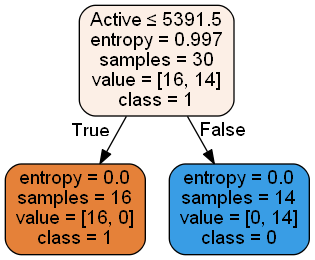

In [359]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X2.columns,class_names=['1','0'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid.png')
Image(graph.create_png())

In [360]:
clf1=DecisionTreeClassifier(criterion='gini')
clf1.fit(X2_train,y2_train)

y2_pred=clf1.predict(X2_test)

df=pd.DataFrame({'Actual':y2_test,'Predicted':y2_pred})
df.head(5)

,Actual,Predicted
23,0,0
32,0,0
16,1,1
14,1,1
10,1,1


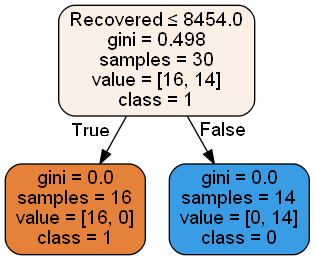

In [361]:
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X2.columns,class_names=['1','0'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid1.png')
Image(graph.create_png())

In [363]:
import seaborn as sns

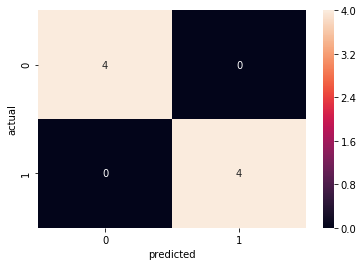

In [364]:
confusion_matrix = pd.crosstab(y2_test, y2_pred,rownames=['actual'],colnames=['predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [373]:
accuracy_score(y2_test, y2_pred)

1.0